<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/EMM441_A2_SHM_Damped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Damped SHM
### Damped Simple Harmonic Motion (SHM)

Damped SHM includes a damping force that is typically proportional to the velocity but opposite in direction. This damping leads to an exponential decay in the amplitude of the motion over time. The presence of damping modifies the differential equation governing SHM, as follows:

#### Differential Equation for Damped SHM

Consider the mass-spring system again, but this time include a damping force. The forces acting on the mass $ m $ now include:
- The restoring force of the spring: $ -kx $
- The damping force: $ -c \dot{x} $, where $ c $ is the damping coefficient and $ \dot{x} $ is the velocity.

Newton's second law gives:

$$ m\ddot{x} = -kx - c\dot{x} $$

Rearranging this, we get the differential equation for damped SHM:

$$ m\ddot{x} + c\dot{x} + kx = 0 $$

Normalize the equation:

$$ \ddot{x} + 2\zeta\omega_0\dot{x} + \omega_0^2x = 0 $$

where

$$ \omega_0 = \sqrt{\frac{k}{m}} $$

 is the natural frequency of the undamped system,

and

$$ \zeta = \frac{c}{2\sqrt{km}} $$

 is the damping ratio.

## Solution of the Differential Equation

The solution of this differential equation depends on the value of $ \zeta $:
1. **Underdamped ($ \zeta < 1 $)**: The system oscillates with a gradually decreasing amplitude.

The general solution is:


   $$
   x(t) = A e^{-\zeta\omega_0 t} \cos(\omega t + \phi)
   $$


   where
   $$ \omega = \omega_0\sqrt{1 - \zeta^2} $$
   
  is the damped angular frequency.

# Python Simulation for Damped SHM
Modify the mass $ m $, spring constant $ k $, and damping coefficient $ c $ to explore different damping behaviors.

This simulation provides a great study of how damping affects the motion of the oscillaing mass, clearly showing the exponential decay in amplitude and the effect on the frequency of oscillation.

This model is commonly used for understanding real-world applications where damping is present, such as shock absorbers in vehicles or building structures during earthquakes.

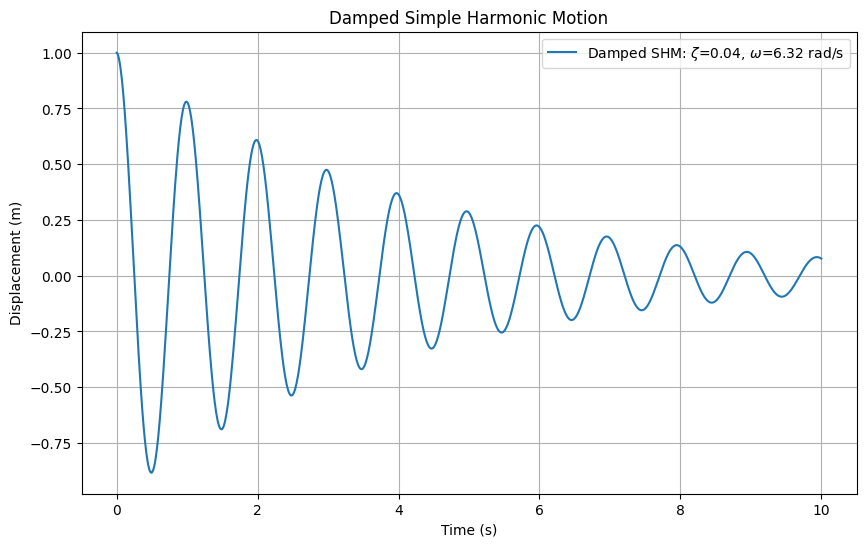

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 1.0  # mass in kilograms
k = 40   # spring constant in N/m
c = 0.5  # damping coefficient in kg/s
A = 1.0  # initial amplitude in meters
phi = 0  # initial phase angle in radians

# Derived quantities
omega0 = np.sqrt(k / m)  # natural frequency
zeta = c / (2 * np.sqrt(k * m))  # damping ratio
omega = omega0 * np.sqrt(1 - zeta**2)  # damped frequency

# Time array
t = np.linspace(0, 10, 1000)

# Displacement as a function of time
x = A * np.exp(-zeta * omega0 * t) * np.cos(omega * t + phi)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, x, label=f'Damped SHM: $\\zeta$={zeta:.2f}, $\\omega$={omega:.2f} rad/s')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Damped Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()

#Extending the Simulations to Other Damping Regimes:

For a damped harmonic oscillator, three distinct cases exist depending on the value of the damping ratio $ \zeta $.
We've discussed the underdamped case already; we can now explore the critically damped and overdamped cases.

#### 1. Critically Damped ($ \zeta = 1 $)
In the critically damped case, the system returns to equilibrium as quickly as possible without oscillating. The general solution for the displacement is given by:
$ x(t) = (A + Bt) e^{-\omega_0 t} $
where $ A $ and $ B $ are constants determined by the initial conditions.

#### 2. Overdamped ($ \zeta > 1 $)
For the overdamped case, the system returns to equilibrium without oscillating but slower than in the critically damped case.
The solution involves a combination of exponential decays:

$$ x(t) = e^{-\zeta \omega_0 t} (A e^{\omega_0 t \sqrt{\zeta^2 - 1}} + B e^{-\omega_0 t \sqrt{\zeta^2 - 1}}) $$

where $ A $ and $ B $ are constants depending on the initial conditions.

# Python Code for Different Damping Cases


### Using the Code
**Adjust parameters**: You can change the mass $ m $, spring constant $ k $, damping coefficient $ c $, amplitude $ A $, and initial phase $ \phi $ to see how different systems behave under varying conditions.


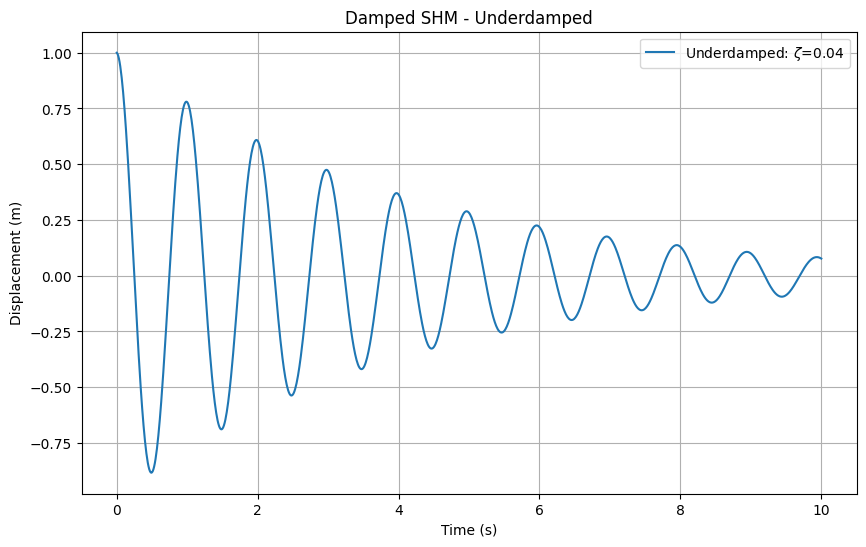

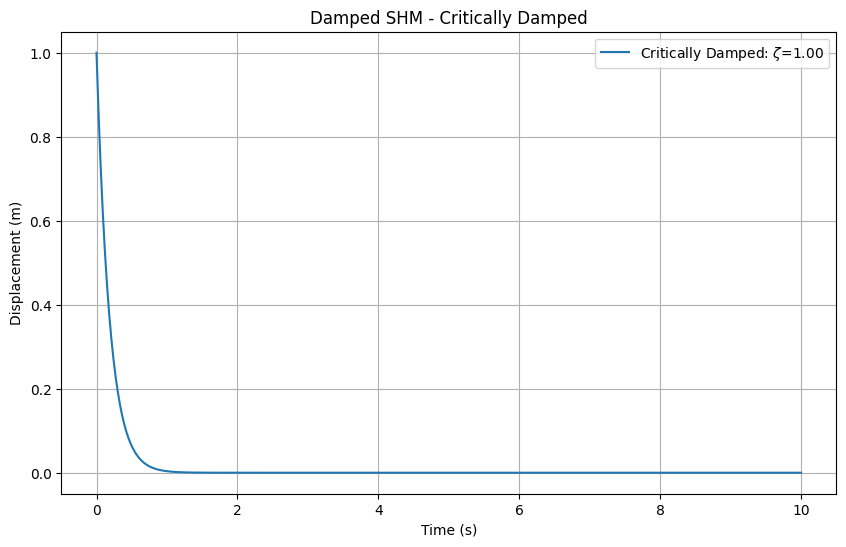

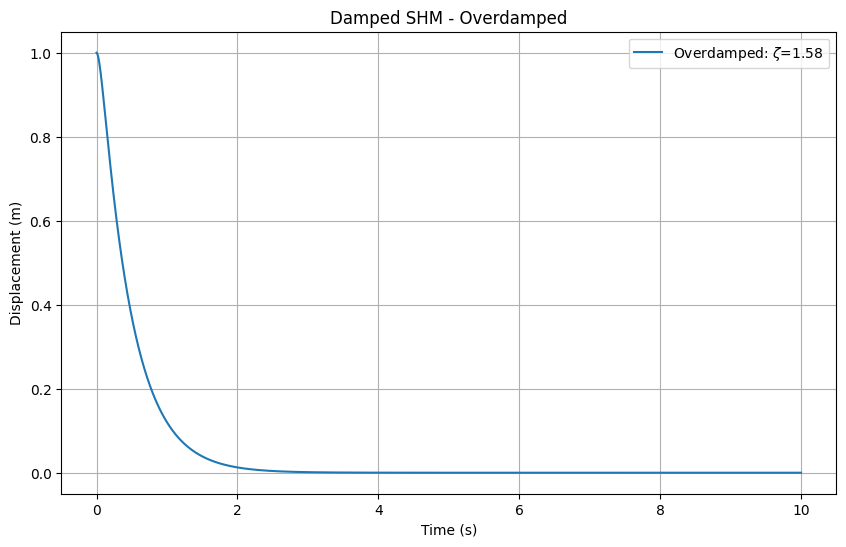

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_damped_SHM(m, k, c, A, phi, title):
    omega0 = np.sqrt(k / m)  # natural frequency
    zeta = c / (2 * np.sqrt(k * m))  # damping ratio
    t = np.linspace(0, 10, 1000)

    if zeta < 1:  # Underdamped
        omega = omega0 * np.sqrt(1 - zeta**2)
        x = A * np.exp(-zeta * omega0 * t) * np.cos(omega * t + phi)
    elif zeta == 1:  # Critically damped
        x = (A + t) * np.exp(-omega0 * t)
    else:  # Overdamped
        alpha = omega0 * np.sqrt(zeta**2 - 1)
        x = np.exp(-zeta * omega0 * t) * (np.cosh(alpha * t) + (zeta / np.sqrt(zeta**2 - 1)) * np.sinh(alpha * t))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t, x, label=f'{title}: $\\zeta$={zeta:.2f}')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.title(f'Damped SHM - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Constants and initial conditions
m = 1.0  # mass in kilograms
k = 40   # spring constant in N/m
A = 1.0  # initial amplitude in meters
phi = 0  # initial phase angle in radians

# Different damping coefficients
c_under = 0.5  # Underdamped
c_crit = 2 * np.sqrt(k * m)  # Critically damped
c_over = 20  # Overdamped

# Plots
plot_damped_SHM(m, k, c_under, A, phi, "Underdamped")
plot_damped_SHM(m, k, c_crit, A, phi, "Critically Damped")
plot_damped_SHM(m, k, c_over, A, phi, "Overdamped")